In [14]:
import neurokit2 as nk
import pandas as pd
import os as os

In [16]:
participantID = 'pb_01'
condition_og  = 'base2'
condition_new = 'base_elevated'
csvFolder     = 'C:/Users/seinj/Teaching/Recordings_2023_EDA/csv-data/'
resultsFolder = 'C:/Users/seinj/Teaching/EDA analysis/'

In [9]:
# Download example multimodal physiology data
data = nk.data("bio_eventrelated_100hz")

# Preprocess the data (filter, find peaks, etc.)
processed_data, info = nk.bio_process(ecg=data["ECG"], rsp=data["RSP"], eda=data["EDA"], sampling_rate=100)

# Compute relevant features
results = nk.bio_analyze(processed_data, sampling_rate=100)
display(results)

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,EDA_SympatheticN,EDA_Autocorrelation,RSA_P2T_Mean,RSA_P2T_Mean_log,RSA_P2T_SD,RSA_P2T_NoRSA,RSA_PorgesBohrer,RSA_Gates_Mean,RSA_Gates_Mean_log,RSA_Gates_SD
0,60.896029,[[985.8940397350993]],[[84.92562646754557]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],[[nan]],[[72.92461861401813]],...,NaN,NaN,91.025641,4.511141,69.08404,0.0,-5.647619,8.43424,2.1323,0.167729


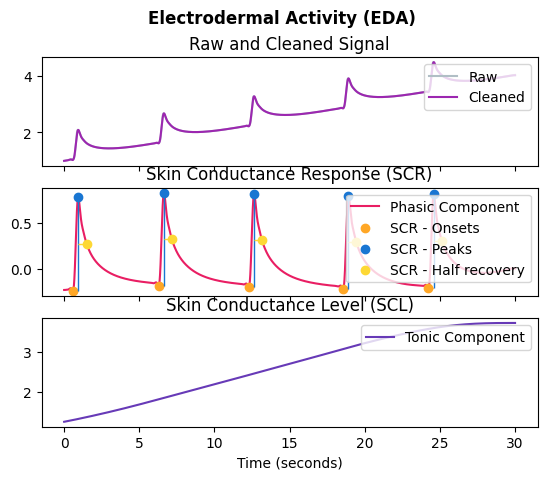

In [3]:
# Simultated EDA data : process and visualize 
eda_signal = nk.eda_simulate(duration=30, scr_number=5, drift=0.1, noise=0)
signals, info = nk.eda_process(eda_signal, sampling_rate=1000)
nk.eda_plot(signals, info)

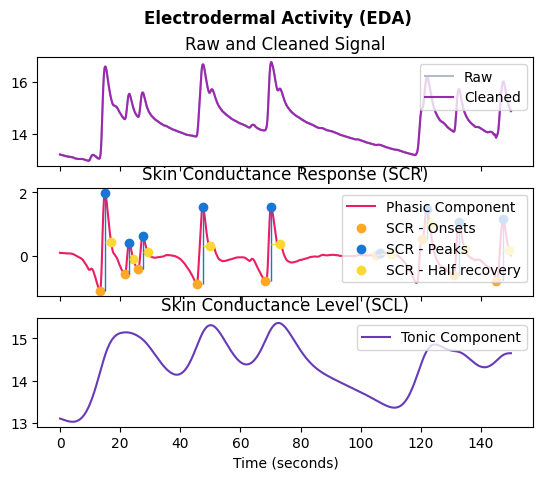

In [4]:
# Example EDA data : process and visualize
signals, info = nk.eda_process(data["EDA"], sampling_rate=100)
nk.eda_plot(signals, info)

[-0.003  0.    -0.003 -0.003 -0.003  0.    -0.006 -0.003 -0.01  -0.01 ]


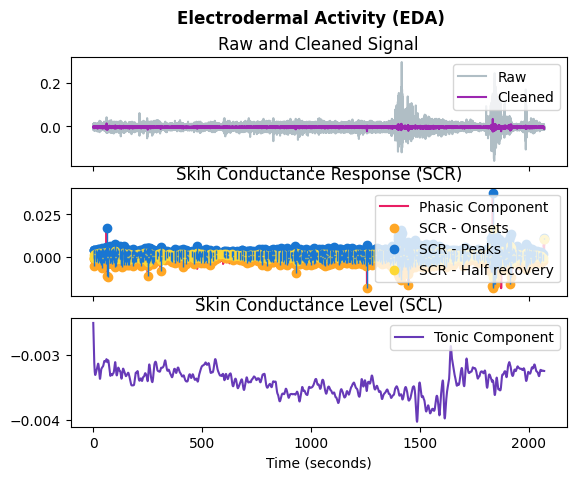

In [11]:
# Recorded EDA data : process and visualize 
# csv_file_path = 'C:/Users/seinj/Teaching/Recordings_2023_EDA/csv-data/pb_01_base2.csv'
csv_file_path = csvFolder + participantID + '_' + condition_og + '.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, header=None, names=['Column1'], skiprows=1)

# Extract the single column as a vector
real_eda = df['Column1'].values

# Print or use the resulting data vector
print(real_eda[:10])
signals, info = nk.eda_process(real_eda, sampling_rate=100)
nk.eda_plot(signals, info)

In [23]:
results = nk.eda_intervalrelated(signals, sampling_rate=10)
display(results) 

,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Sympathetic,EDA_SympatheticN,EDA_Autocorrelation
0,835.0,0.00718,0.000184,0.000002,0.154792,0.048943


In [25]:
# Save data into a table 

# Add a participant ID column to the DataFrame
results['Participant_ID'] = participantID

# Reorder columns so that the participant ID is the first column
results = results[['Participant_ID'] + [col for col in results.columns if col != 'Participant_ID']]

# Specify the file path for the TSV file
# file_path = 'C:/Users/seinj/Teaching/EMG-ECG analysis/results_' + condition + '_ecg.tsv'
file_path = resultsFolder + 'results_' + condition_new + '_eda.tsv'

# Check if the file already exists
if os.path.exists(file_path):
    # If the file exists, read the existing data
    existing_data = pd.read_csv(file_path, sep='\t')

    # Iterate through participant IDs in the existing data
    for idx, row in results.iterrows():
        existing_index = existing_data.index[existing_data['Participant_ID'] == row['Participant_ID']]
        if not existing_index.empty:
            # If the participant ID already exists, drop the existing row and append the new row
            existing_data = pd.concat([existing_data.drop(existing_index), pd.DataFrame([row], columns=existing_data.columns)], ignore_index=True)
        else:
            # If the participant ID does not exist, append the row
            existing_data = pd.concat([existing_data, pd.DataFrame([row], columns=existing_data.columns)], ignore_index=True)

    # Save the updated DataFrame to the TSV file
    existing_data.to_csv(file_path, sep='\t', index=False)
else:
    # If the file does not exist, save the entire DataFrame to the TSV file
    results.to_csv(file_path, sep='\t', index=False)
